In [1]:
%pylab inline
import xcml
import siestah2o as h2o
import pickle
from mbpol_calculator import MbpolCalculator, reconnect_monomers
from ase import Atoms
import siesta_utils.grid as siesta
from ase.io import iread

Populating the interactive namespace from numpy and matplotlib


/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
krr_O = pickle.load(open('/gpfs/home/smdick/exchange_ml/models/final/krr_Oxygen_mulliken_szptodz', 'rb'))
krr_H = pickle.load(open('/gpfs/home/smdick/exchange_ml/models/final/krr_Hydrogen_mulliken_szptodz', 'rb'))
# nn = xcml.load_network('/gpfs/home/smdick/exchange_ml/models/final/nn_mulliken/')

In [3]:
n_o_orb = 9
n_h_orb = 4
n_orb = n_o_orb + 2*n_h_orb

In [4]:
M_sz = np.genfromtxt('/gpfs/home/smdick/exchange_ml/data/synced/128/szp/M.dat', delimiter = ',').reshape(-1,128,n_orb)

In [5]:
coords = np.genfromtxt('/gpfs/home/smdick/exchange_ml/data/synced/128/szp/coords.gauss', delimiter = ',').reshape(-1,128,3,3)
forces_sz = np.genfromtxt('/gpfs/home/smdick/exchange_ml/data/synced/128/szp/forces.dat', delimiter = ',').reshape(-1,128,3,3)
forces_dz = np.genfromtxt('/gpfs/home/smdick/exchange_ml/data/synced/128/dzp/forces.dat', delimiter = ',').reshape(-1,128,3,3)

In [6]:
siesta.unitcell = np.zeros([3,3])
siesta.unitcell[0,0] = 15.646*xcml.AtoBohr

In [7]:
corr = xcml.use_force_model(M_sz.reshape(-1,n_orb), krr_O, krr_H, n_o_orb, n_h_orb, True,
                            xcml.fold_back_coords(coords.reshape(-1,3,3),siesta))

In [8]:
forces_corrected = forces_sz - corr.reshape(-1,128,3,3)

1.5197754562926458
0.17586057379426667


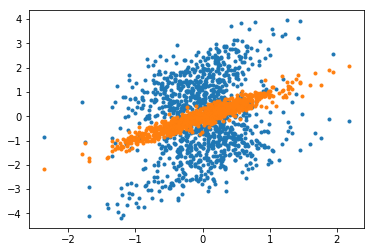

In [9]:
i = -1
a = 0
plot(forces_dz[i,:,:,:].flatten(), forces_sz[i,:,:,:].flatten(), ls = '', marker = '.')
plot(forces_dz[i,:,:,:].flatten(), forces_corrected[i,:,:,:].flatten(), ls = '', marker = '.')
print(np.std(forces_dz[i,:,:,:].flatten()- forces_sz[i,:,:,:].flatten()))
print(np.std(forces_dz[i,:,:,:].flatten()- forces_corrected[i,:,:,:].flatten()))